<a href="https://colab.research.google.com/github/Mushfiq-Azam/Learn-ML-with-Mushfiq/blob/main/Next_Gen(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Full pipeline from data insight to model comparison
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
df = pd.read_csv("2.csv")

In [ ]:
# Step 1: Data Insight
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                18915 non-null  float64
 1   A2                 18915 non-null  object 
 2   C1                 18915 non-null  object 
 3   D2                 18915 non-null  object 
 4   D4                 18915 non-null  object 
 5   D8                 18915 non-null  object 
 6   D10                18915 non-null  object 
 7   D15                18915 non-null  object 
 8   job                18405 non-null  object 
 9   F15                18915 non-null  object 
 10  M8                 18915 non-null  object 
 11  E17                18915 non-null  object 
 12  G1                 18915 non-null  object 
 13  J2                 18915 non-null  object 
 14  J4                 18915 non-null  object 
 15  J9                 18915 non-null  object 
 16  E1                 189

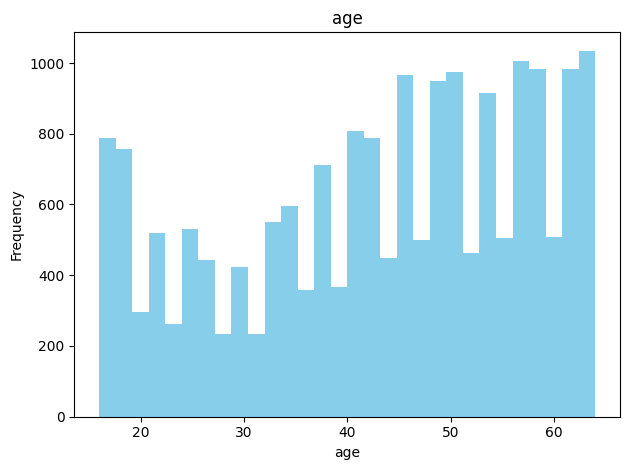

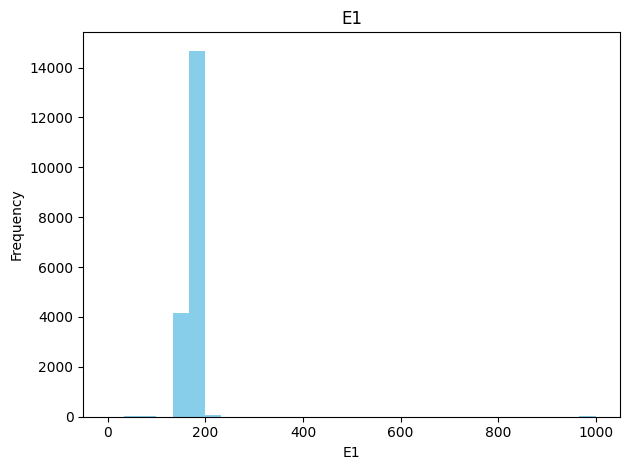

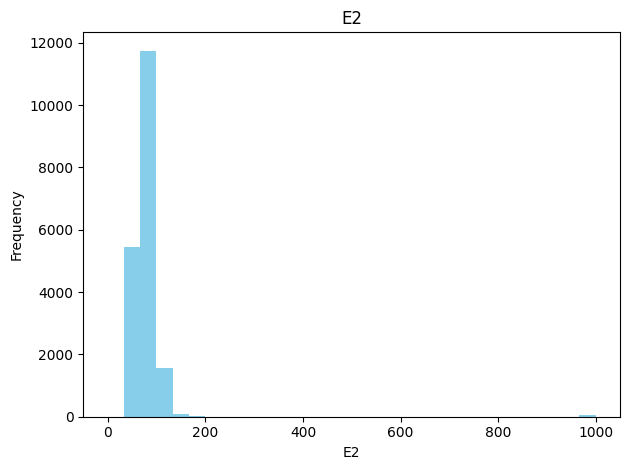

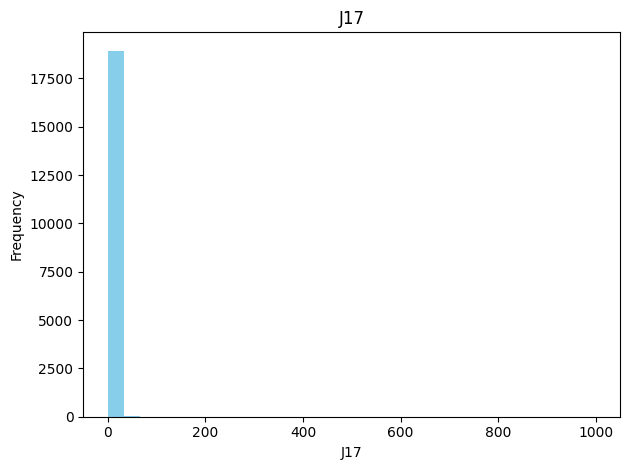

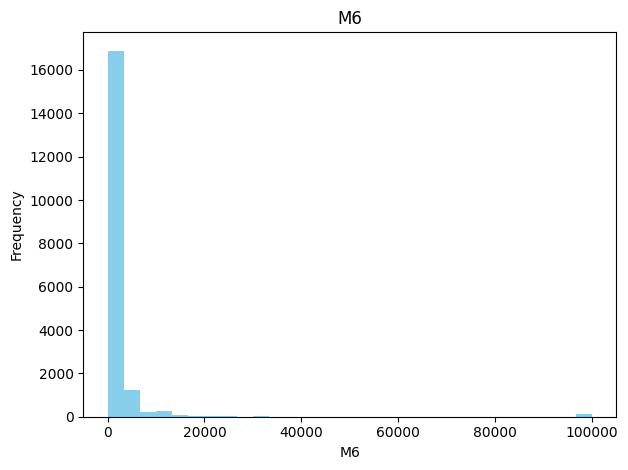

In [ ]:
# Step 2: Numerical Histograms
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_features[:5]:  # limit to first 5
    df[col].plot(kind='hist', bins=30, color='skyblue', title=col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

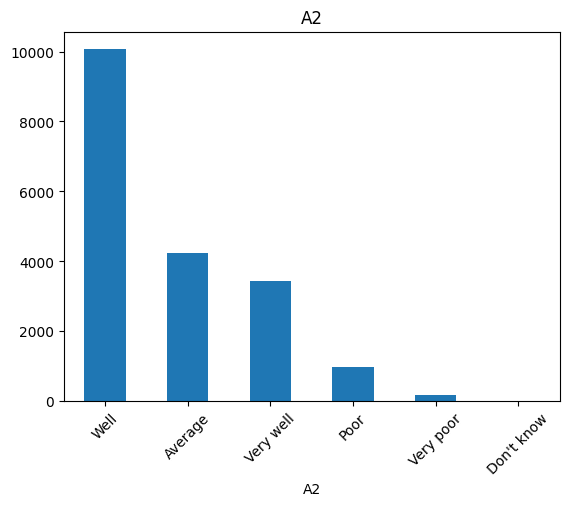

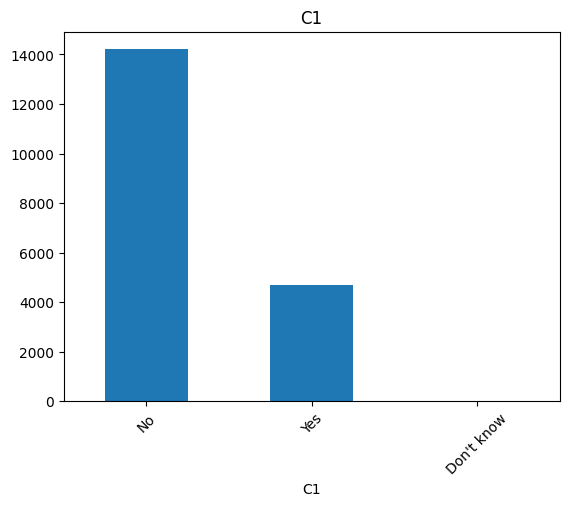

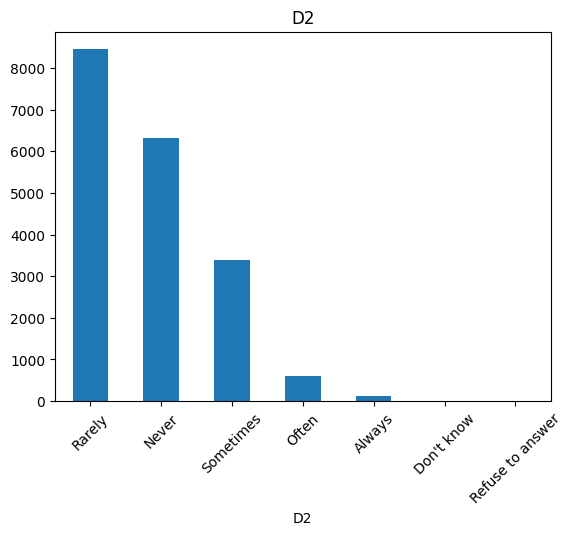

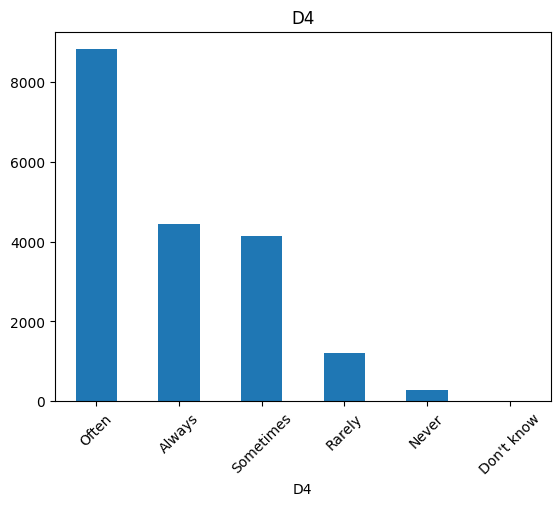

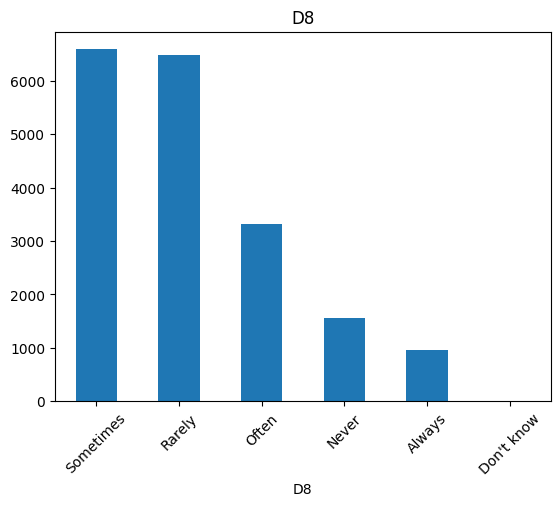

In [ ]:
# Step 3: Categorical Bar Charts
categorical_features = df.select_dtypes(include='object').columns.tolist()
for col in categorical_features[:5]:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.xticks(rotation=45)
    plt.show()

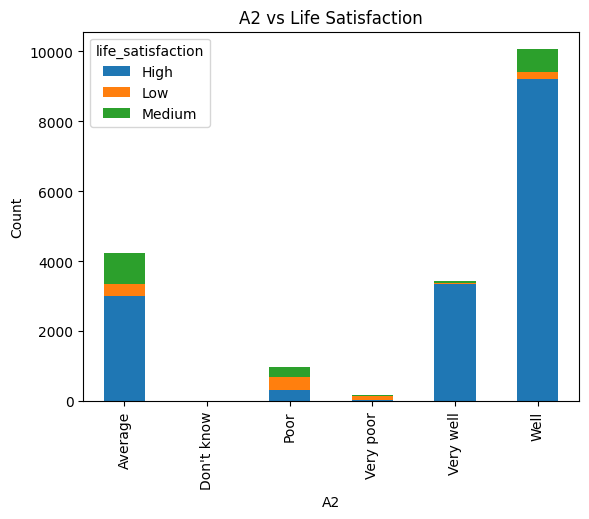

In [ ]:
# Step 4: Bar Plot Categorical vs Categorical
pd.crosstab(df['A2'], df['life_satisfaction']).plot(kind='bar', stacked=True)
plt.title("A2 vs Life Satisfaction")
plt.ylabel("Count")
plt.show()


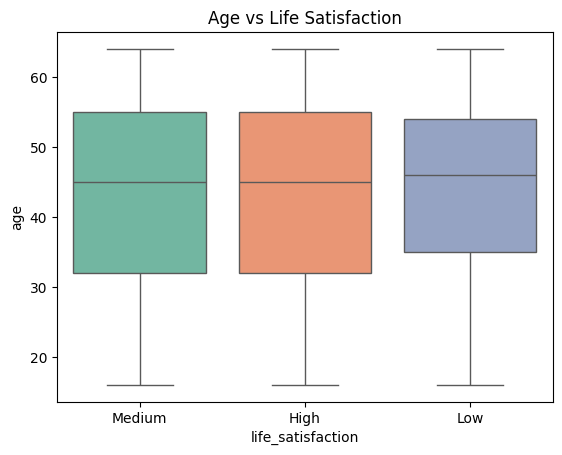

In [ ]:
# Step 5: Categorical vs Numerical
sns.boxplot(data=df, x='life_satisfaction', y='age', palette='Set2')
plt.title("Age vs Life Satisfaction")
plt.show()

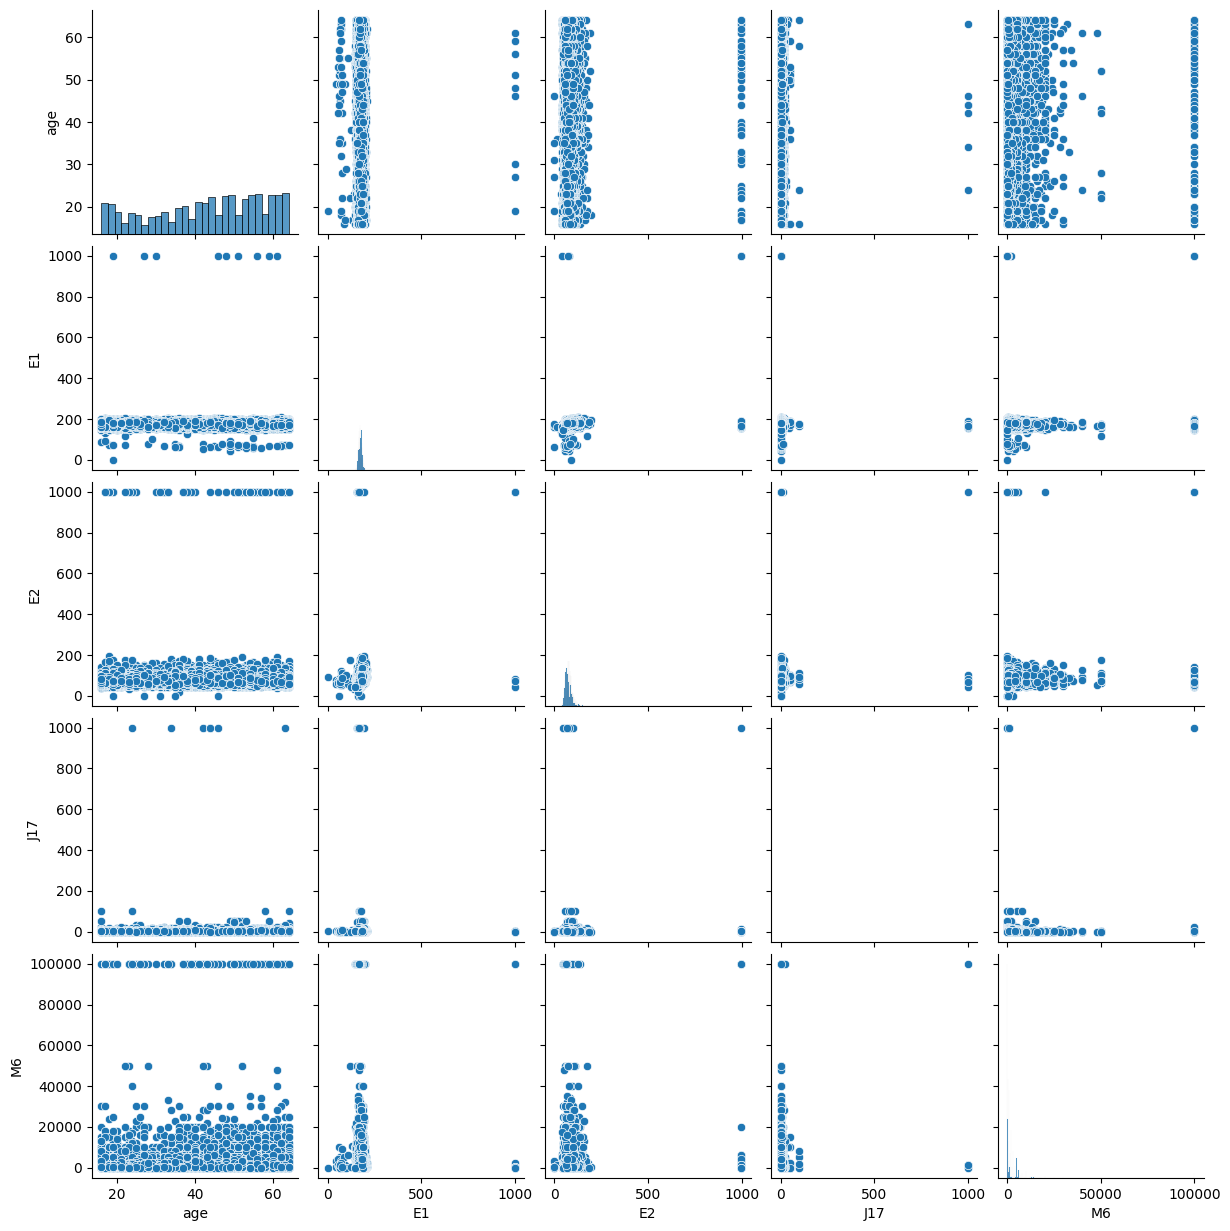

In [ ]:
# Step 6: Pair Plot
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_df)
plt.show()

In [ ]:
# Step 7: Missing Data Handling
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

df[num_cols] = SimpleImputer(strategy='mean').fit_transform(df[num_cols])
df[cat_cols] = SimpleImputer(strategy='constant', fill_value='Unknown').fit_transform(df[cat_cols])

print("After handling missing values:")
print(df.isnull().sum())
print(df.head())

After handling missing values:
age                  0
A2                   0
C1                   0
D2                   0
D4                   0
D8                   0
D10                  0
D15                  0
job                  0
F15                  0
M8                   0
E17                  0
G1                   0
J2                   0
J4                   0
J9                   0
E1                   0
E2                   0
J17                  0
M6                   0
life_satisfaction    0
dtype: int64
    age       A2  C1         D2      D4      D8        D10        D15  \
0  49.0  Average  No     Rarely   Often  Rarely      Often      Often   
1  39.0     Well  No     Rarely   Often  Rarely      Often      Often   
2  64.0  Average  No  Sometimes   Often  Always  Sometimes     Rarely   
3  30.0     Well  No     Always  Always  Always      Often     Rarely   
4  48.0     Well  No  Sometimes  Rarely   Often  Sometimes  Sometimes   

                                  

In [ ]:
# Step 8: Define X, y

X = df.drop('life_satisfaction', axis=1)
y = df['life_satisfaction']

In [ ]:
# ✅ Step 9: One-hot encode with get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)
# View encoded data
print("🔹 After One-Hot Encoding:")
print(X_encoded.head())
print("Shape:", X_encoded.shape)

🔹 After One-Hot Encoding:
    age     E1    E2   J17      M6  A2_Don't know  A2_Poor  A2_Unknown  \
0  49.0  185.0  82.0  18.0   500.0          False    False       False   
1  39.0  183.0  75.0   2.0  1000.0          False    False       False   
2  64.0  158.0  60.0   1.0  4000.0          False    False       False   
3  30.0  190.0  76.0   0.0   400.0          False    False       False   
4  48.0  175.0  94.0   0.0  2000.0          False    False       False   

   A2_Very poor  A2_Very well  ...  J4_Several times a month  \
0         False         False  ...                     False   
1         False         False  ...                      True   
2         False         False  ...                     False   
3         False         False  ...                     False   
4         False         False  ...                     False   

   J4_Several times a week  J4_Unknown  J9_Less frequently  J9_Never  \
0                    False       False                True     False   


In [ ]:
# Step 10: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# Step 11: SMOTE + Tomek Links
sm = SMOTE(random_state=42)
tl = TomekLinks()
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
X_cleaned, y_cleaned = tl.fit_resample(X_resampled, y_resampled)



# View scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
print("🔹 After Standardization:")
print(X_scaled_df.head())
print("Shape:", X_scaled_df.shape)

# View resampled data
X_cleaned_df = pd.DataFrame(X_cleaned, columns=X_encoded.columns)
print("🔹 After SMOTE + Tomek Links:")
print(X_cleaned_df.head())
print("Shape:", X_cleaned_df.shape)

🔹 After Standardization:
        age        E1        E2       J17        M6  A2_Don't know   A2_Poor  \
0  0.420954  0.517824  0.037863  0.803334 -0.182647      -0.007263 -0.232728   
1 -0.286905  0.422199 -0.088097 -0.022033 -0.123169      -0.007263 -0.232728   
2  1.482743 -0.773107 -0.358012 -0.073619  0.233699      -0.007263 -0.232728   
3 -0.923978  0.756885 -0.070103 -0.125204 -0.194543      -0.007263 -0.232728   
4  0.350169  0.039701  0.253795 -0.125204 -0.004213      -0.007263 -0.232728   

   A2_Unknown  A2_Very poor  A2_Very well  ...  J4_Several times a month  \
0   -0.047122     -0.099543     -0.471594  ...                 -0.480681   
1   -0.047122     -0.099543     -0.471594  ...                  2.080383   
2   -0.047122     -0.099543     -0.471594  ...                 -0.480681   
3   -0.047122     -0.099543     -0.471594  ...                 -0.480681   
4   -0.047122     -0.099543     -0.471594  ...                 -0.480681   

   J4_Several times a week  J4_Unknow

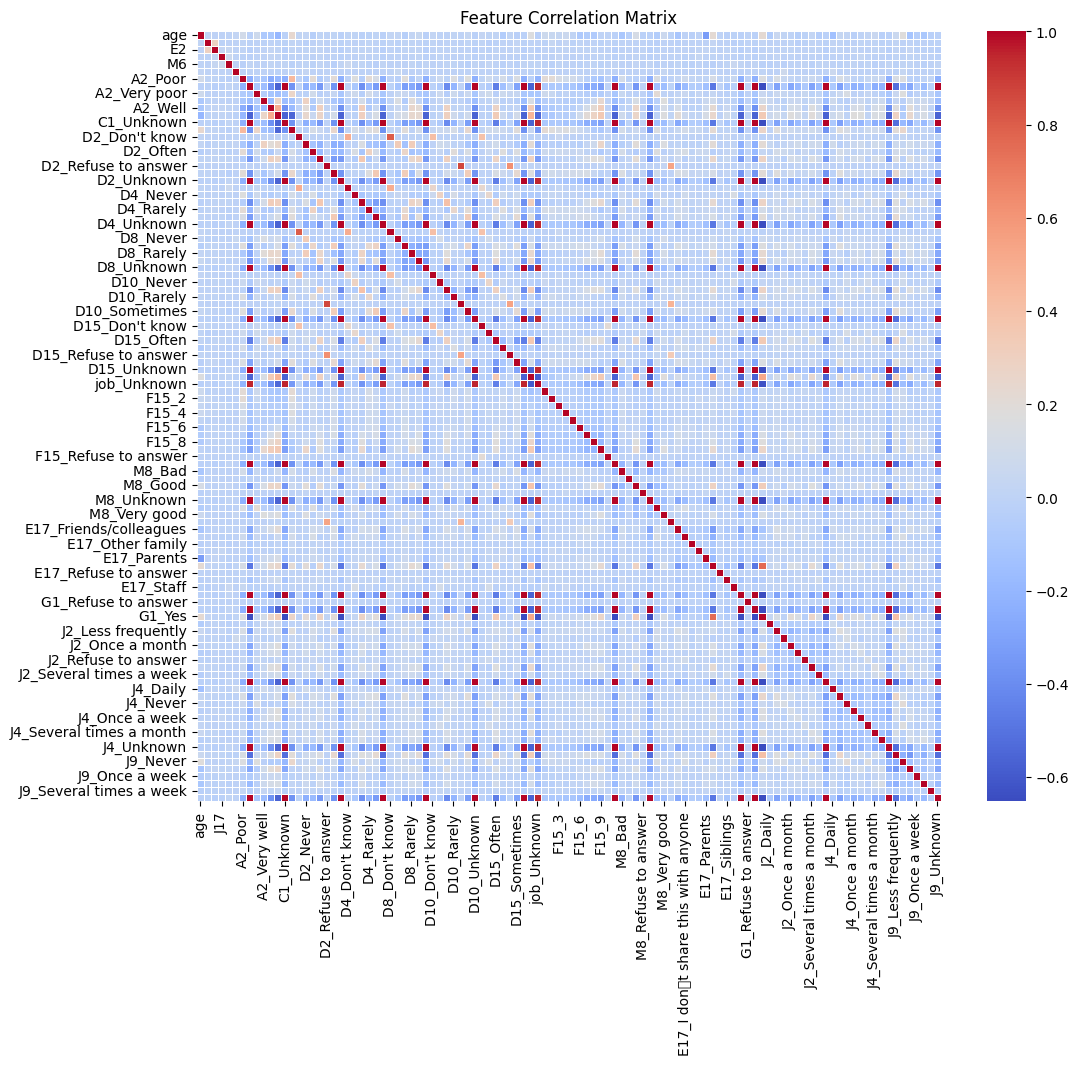

In [ ]:
# Step 12: Correlation Matrix
X_cleaned_df = pd.DataFrame(X_cleaned, columns=X_encoded.columns)
corr_matrix = X_cleaned_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Step 13: Outlier Removal
iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(X_cleaned)
mask = outliers != -1
X_clean, y_clean = X_cleaned[mask], y_cleaned[mask]

In [ ]:
# Step 14: Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
)


In [ ]:
# Step 15: Classification Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "KNN": KNeighborsClassifier()
}

results = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1-Score": {},
}

# Model training and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results["Accuracy"][name] = accuracy_score(y_test, y_pred)
    results["Precision"][name] = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    results["Recall"][name] = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    results["F1-Score"][name] = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [ ]:
# Step 16: Show Comparison Table
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values("Accuracy", ascending=False)
print(comparison_df.round(4))

                     Accuracy  Precision  Recall  F1-Score
Random Forest          0.9601     0.9603  0.9601    0.9600
XGBoost                0.9481     0.9486  0.9481    0.9479
KNN                    0.9116     0.9253  0.9116    0.9069
Decision Tree          0.8928     0.8928  0.8928    0.8928
Logistic Regression    0.7498     0.7476  0.7498    0.7482
SVM                    0.7444     0.7435  0.7444    0.7429


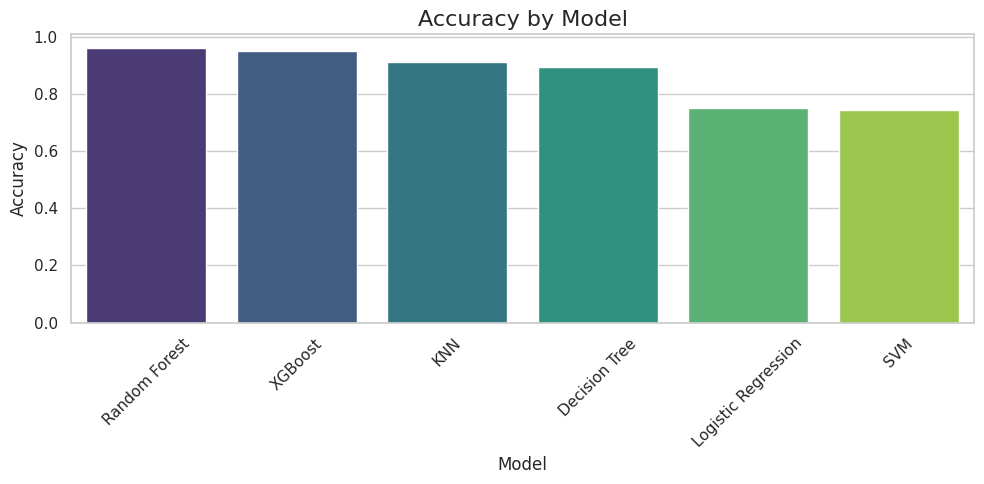

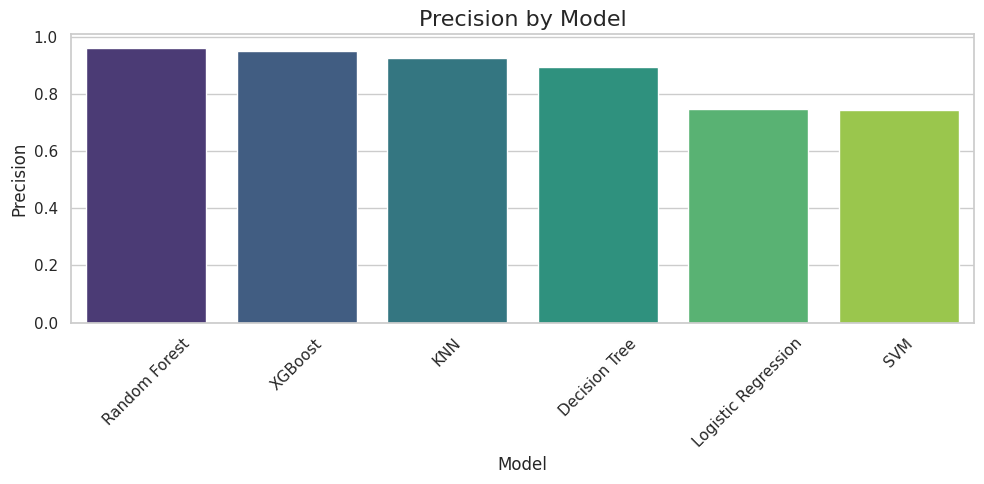

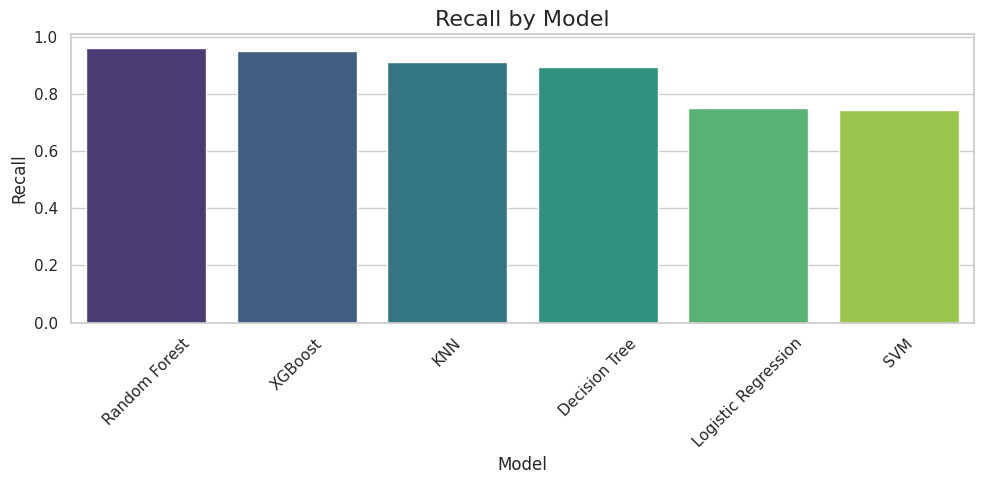

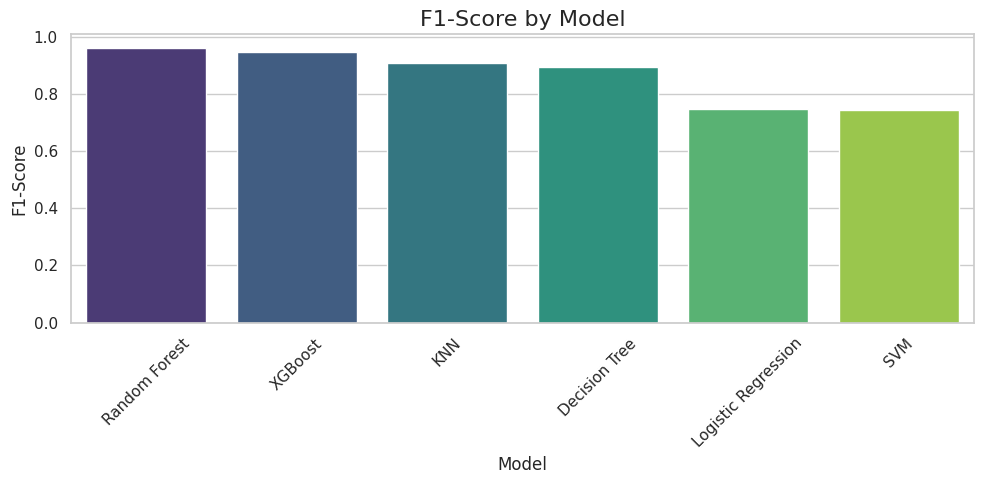

In [ ]:
# Step 17: Plot Evaluation
sns.set(style="whitegrid")
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=comparison_df.index,
        y=metric,
        data=comparison_df,
        palette="viridis"
    )
    plt.title(f"{metric} by Model", fontsize=16)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
